In [24]:
### import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("Copy of sonar data.csv")                                    ### dataset loading   

In [26]:
df.head(2)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [27]:
df = pd.read_csv("Copy of sonar data.csv", header=None)

In [28]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


In [29]:
### analyzing dataset

for i in range(1,2,1):
    print("SHAPE:")    
    print(df.shape)
    print("COLUMNS:")  
    print(df.columns)
    print("HEAD:")     
    print(df.head(2))
    print("DESCRIBE:")            #describe --> statistical measures of the data
    print(df.describe())
    print("INFO:")
    print(df.info())

SHAPE:
(208, 61)
COLUMNS:
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')
HEAD:
       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   

       9   ...      51      52      53      54      55     56      57      58  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.018  0.0084  0.0090   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.014  0.0049  0.0052   

       59  60  
0  0.0032   R  
1  0.0044   R  

[2 rows x 61 columns]
DESCRIBE:
               0           1           2           3           4           5   \
count  208.

In [30]:
df[60].value_counts()                                            #60-featurename or column 

M    111
R     97
Name: 60, dtype: int64

In [8]:
###note:
#M --> Mine
#R --> Rock

In [31]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [32]:
df.isnull().sum().sum()                                                    ### to check null values

0

<AxesSubplot:>

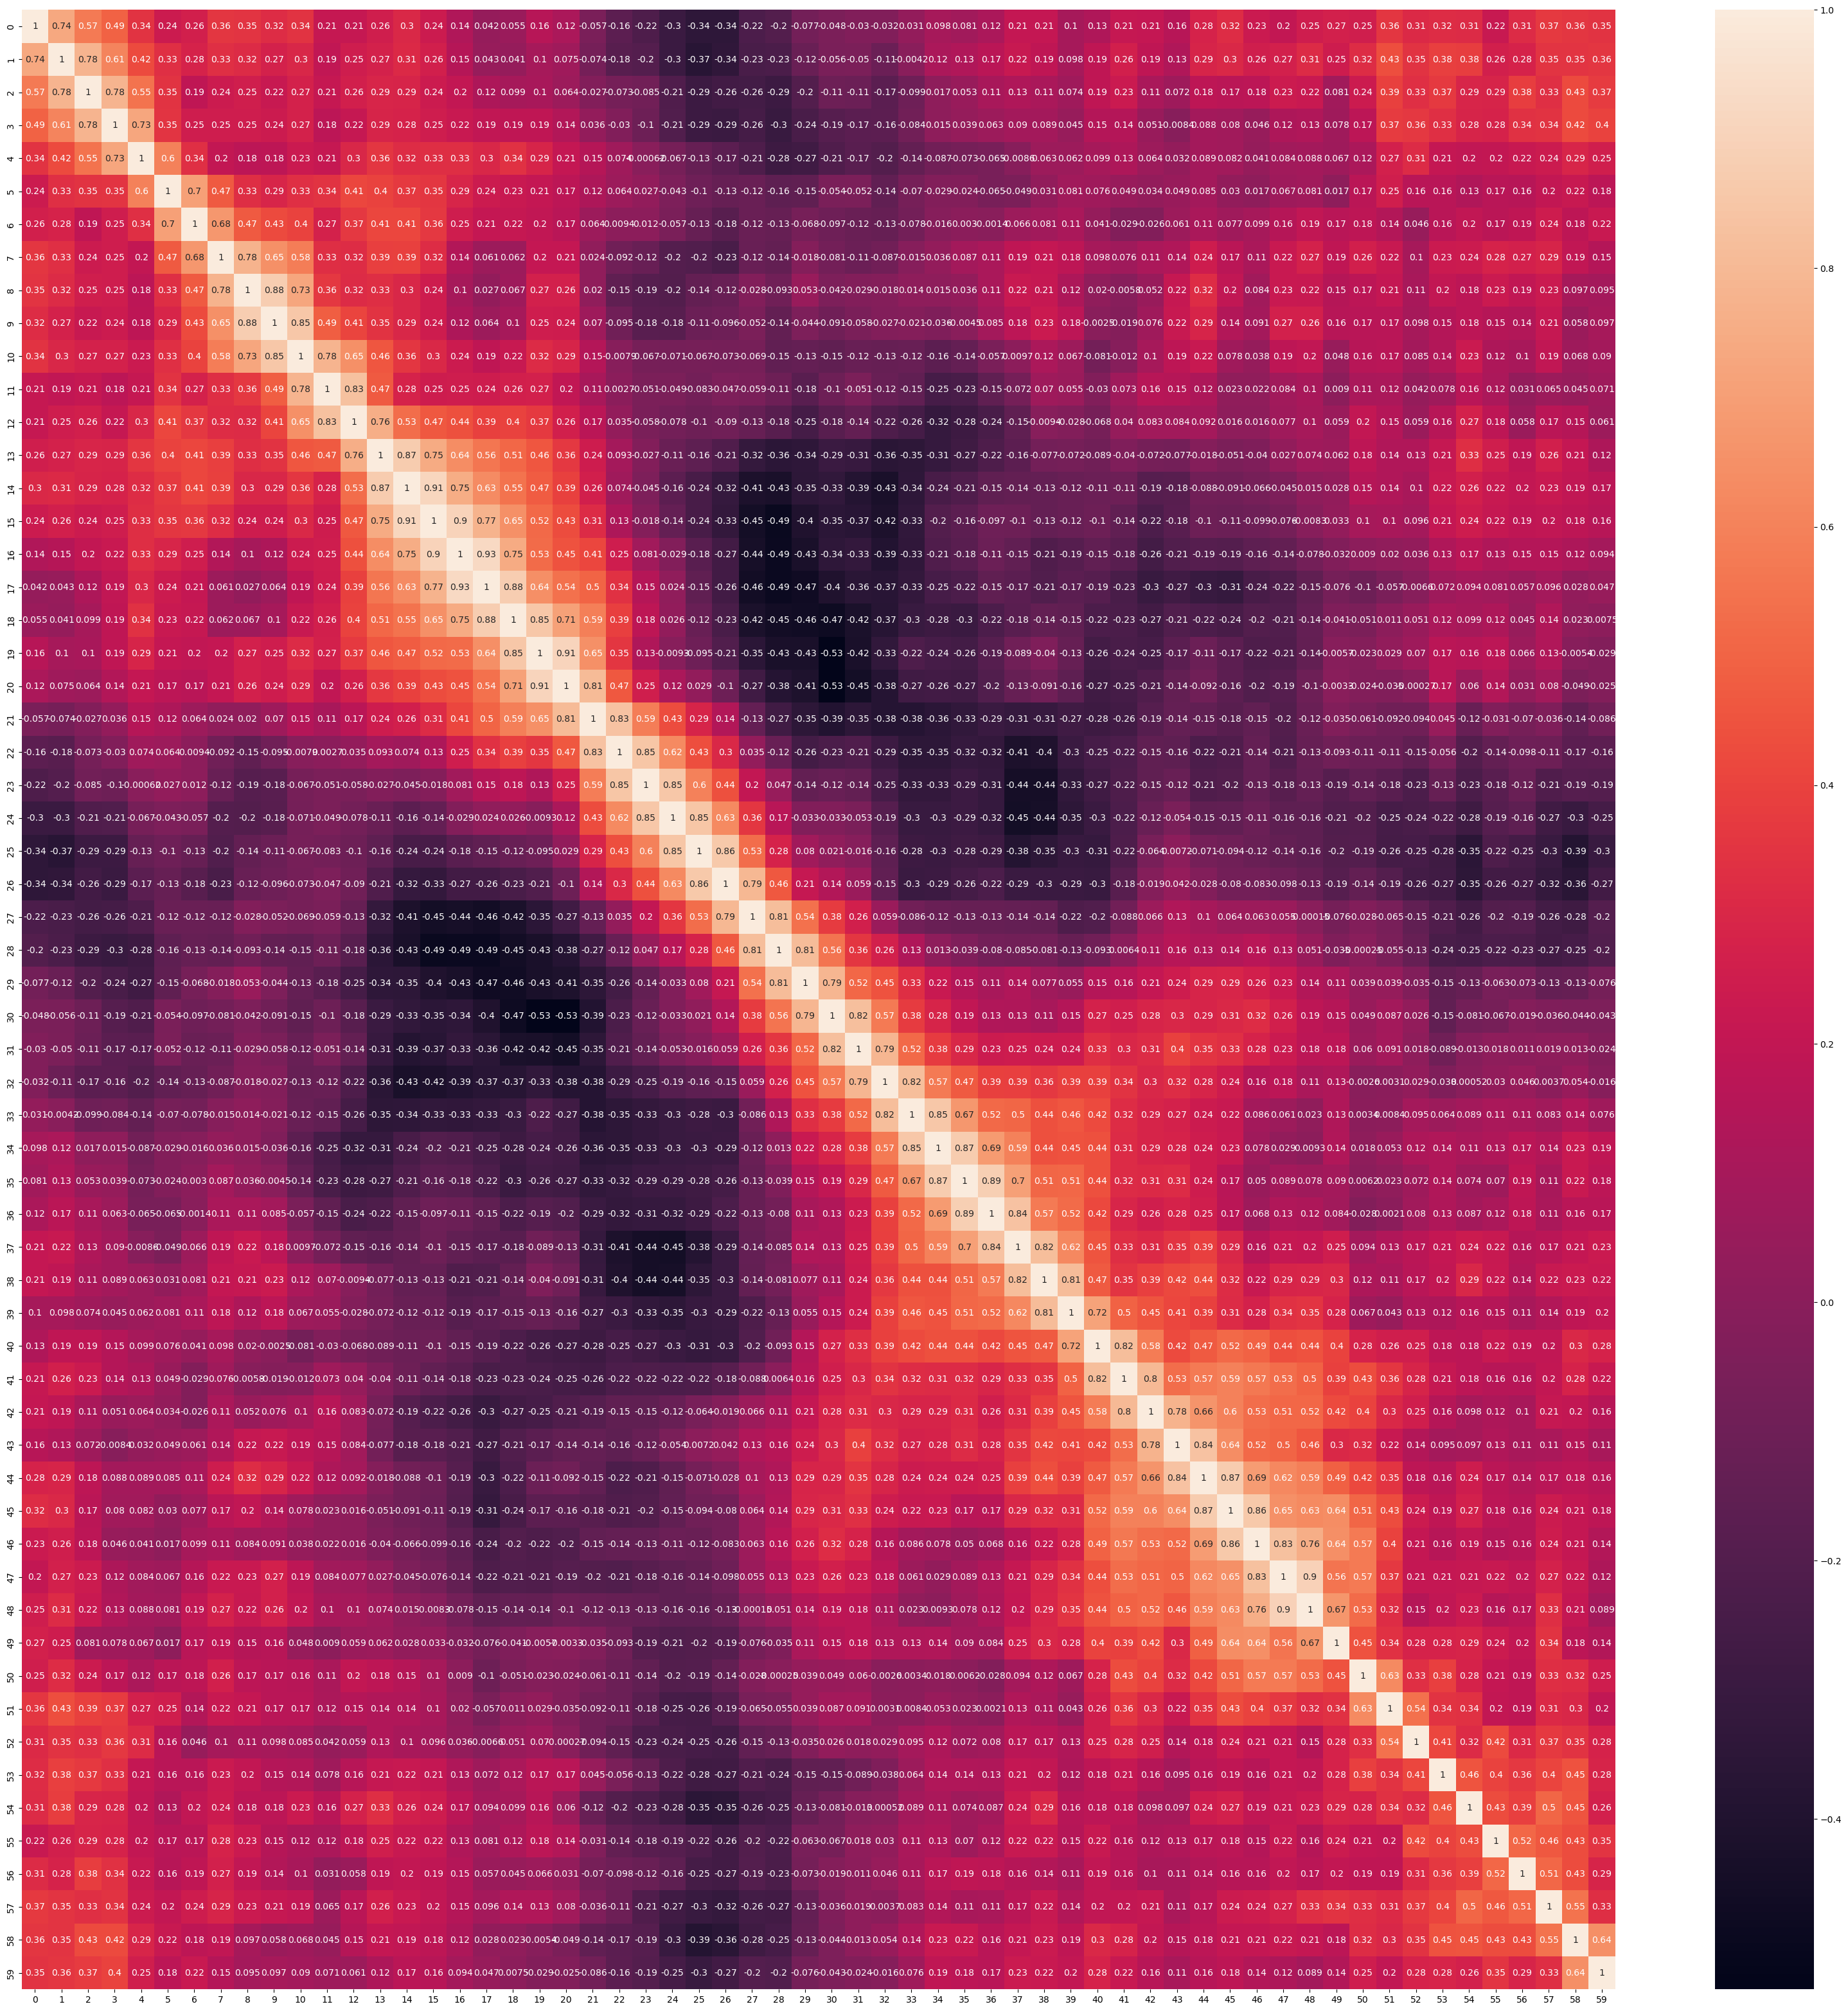

In [41]:
#visualization dataset(heatmap)
plt.figure(figsize=(40,40))                                            
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='60', ylabel='count'>

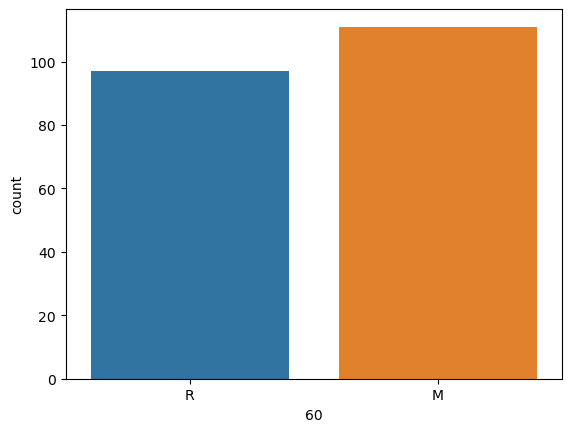

In [33]:
sns.countplot(x=60, data=df)

In [35]:
Y = df[60]                                                                           #splitting X & Y
X = df.drop([60], axis=1) 

In [36]:
from sklearn.model_selection import train_test_split                                #traintestsplit
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

In [37]:
from sklearn.metrics import accuracy_score
#Model Training 
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
m.fit(X_train, Y_train)                                  ##training the Logistic Regression model with training data
#Model Evaluation-1
pred = m.predict(X_train)
accuracy = accuracy_score(pred, Y_train)           #accuracy on training data
print('Accuracy on training data : ', accuracy)    

Accuracy on training data :  0.8342245989304813


In [38]:
#Model Evaluation-2
predi = m.predict(X_test)
accuracy = accuracy_score(predi, Y_test)           #accuracy on test data
print('Accuracy on test data : ', accuracy)

Accuracy on test data :  0.7619047619047619


In [39]:
#Making a Predictive System - 1
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = m.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
    print('The object is a Rock')
else:
    print('The object is a mine')

['M']
The object is a mine


In [41]:
#Predictive System - 2
ip_data = (0.0702,0.0123,0.0553,0.0821,0.0411,0.0277,0.0465,0.0664,0.1460,0.4792,0.4877,0.6992,0.9981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

ip_data_as_np_array = np.asarray(ip_data)                  # changing the input_data to a numpy array

ip_data_reshaped = ip_data_as_np_array.reshape(1,-1)       # reshape the np array as we are predicting for one instance

prediction = m.predict(ip_data_reshaped)
print(prediction)

['M']


In [42]:
if (prediction[0]=='R'):
    print('The object is a Rock')
else:
    print('The object is a mine')

The object is a mine
